In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
class SalesmanAnneal:
    '''Class to solve the traveling salesman problem with simulated annealing'''
    
    def __init__(self,nCities,T0,tau,Tmin,initTour=[]):
        
        self.nCities=nCities
        self.T0=T0
        self.tau=tau
        self.Tmin=Tmin
        
        if np.array(initTour).size==0:
            self.initTour,self.initD=self.set_cities()
        else:
            self.initTour=initTour
            self.initD=self.get_D(initTour)
        
        self.tours,self.Ds,self.t=self.monte_carlo_anneal(self.initTour,self.initD)
     
    
    def set_cities(self):
        '''Pick random positions of cities, order defines inital tour'''
        
        tour=np.random.rand(self.nCities+1,2)
        tour[-1,:]=tour[0,:]
        D=self.get_D(tour)
        
        return tour,D
            
    def get_D(self,tour):
        '''Calculate the distance of the tour'''

        D=0
        for d in range(1,self.nCities+1):
            D+=np.sqrt(np.sum((tour[d-1,:]-tour[d,:])**2))

        return D
        
    def monte_carlo_anneal(self,initTour,initD):
        '''Perform the Monte Carlo simulated annealing'''
        
        Ds=[initD]
        tours=[initTour]
        
        tour=initTour
        D=initD
        
        T=self.T0
        t=1
        while(T > Tmin):
            
            # Swap cities
            swap=[0,0]
            while swap[0]==swap[1]:
                swap=np.random.randint(1,self.nCities,size=2)
            
            tour[swap[0],0],tour[swap[1],0]=tour[swap[1],0],tour[swap[0],0]
            tour[swap[0],1],tour[swap[1],1]=tour[swap[1],1],tour[swap[0],1]
            
            newD=self.get_D(tour)
        
            if newD <= D or np.random.rand() < np.exp(-(newD-D)/T): # Accept            
                tours.append(np.copy(tour))
                Ds.append(np.copy(newD))
                D=np.copy(newD)
            else: # Reject
                tour[swap[1],0],tour[swap[0],0]=tour[swap[0],0],tour[swap[1],0] # swap back
                tour[swap[1],1],tour[swap[0],1]=tour[swap[0],1],tour[swap[1],1]
                tours.append(np.copy(tour))
                Ds.append(np.copy(D))
        
            # Lower the temperature
            T=self.T0*np.exp(-t/self.tau)
            t+=1
            
        return tours,Ds,t-1
        

In [7]:
# Parameters
nCities=25
T0=10
tau=1e4
Tmin=1e-3

# Solve the traveling salesman problem with simulated annealing
sm=SalesmanAnneal(nCities,T0,tau,Tmin)


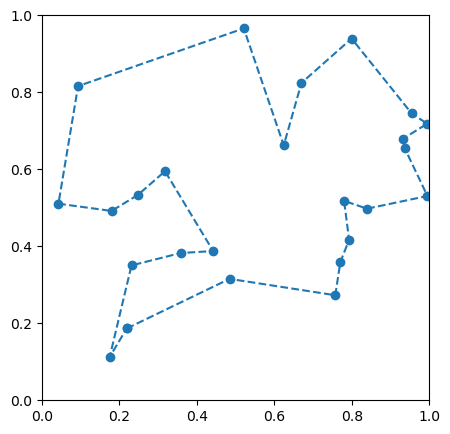

In [8]:
# Make animated plot of the sampled tours

tours=sm.tours
tMax=sm.t

fig1,ax1=plt.subplots(figsize=(5,5))
line,=ax1.plot(tours[0][:,0],tours[0][:,1],'o--')
ax1.set_ylim(0,1)
ax1.set_xlim(0,1)

rate=500 # Print every 500th tour
def animate(i):
    ax1.clear()
    ax1.set_ylim(0,1)
    ax1.set_xlim(0,1)
    ax1.plot(tours[i*rate][:,0],tours[i*rate][:,1],'o--')
    
    return line,

anim = FuncAnimation(fig1, animate, frames=int(tMax/rate), interval=1,repeat=False,blit=True)

anim.save('salesman.gif',writer='imagemagick',fps=5)

plt.show()


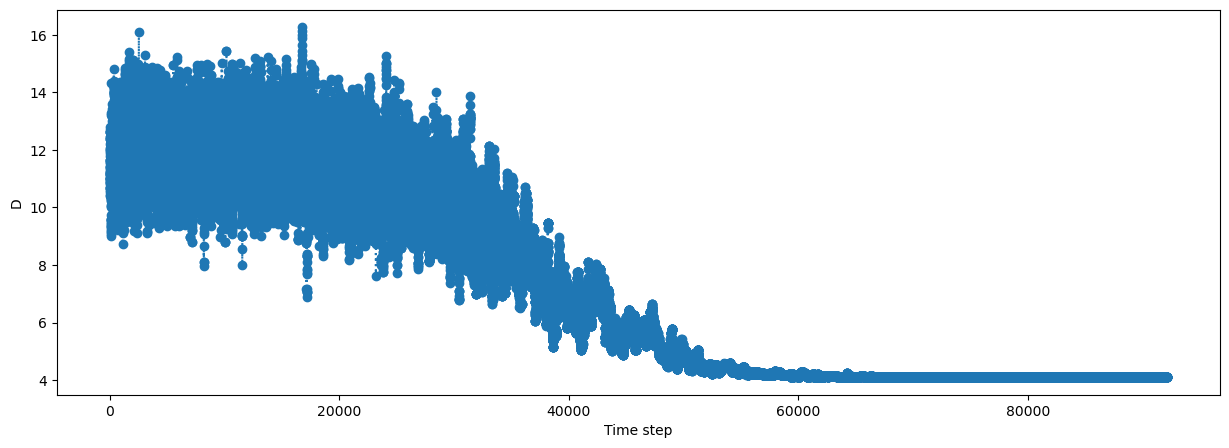

In [9]:
# Plot D versus samples tour
fig, ax=plt.subplots(figsize=(15,5))

ax.plot(sm.Ds,'o:')
ax.set_ylabel('D')
ax.set_xlabel('Time step')

plt.savefig('salesman_D.pdf',bbox_inches='tight')
plt.show()

In [10]:
# Lets check different starting temperatures
sm_1000=SalesmanAnneal(25,1000,1e3,1e-3)
sm_100=SalesmanAnneal(25,100,1e3,1e-3,initTour=sm_1000.initTour)
sm_10=SalesmanAnneal(25,10,1e3,1e-3,initTour=sm_1000.initTour)
sm_1=SalesmanAnneal(25,1,1e3,1e-3,initTour=sm_1000.initTour)

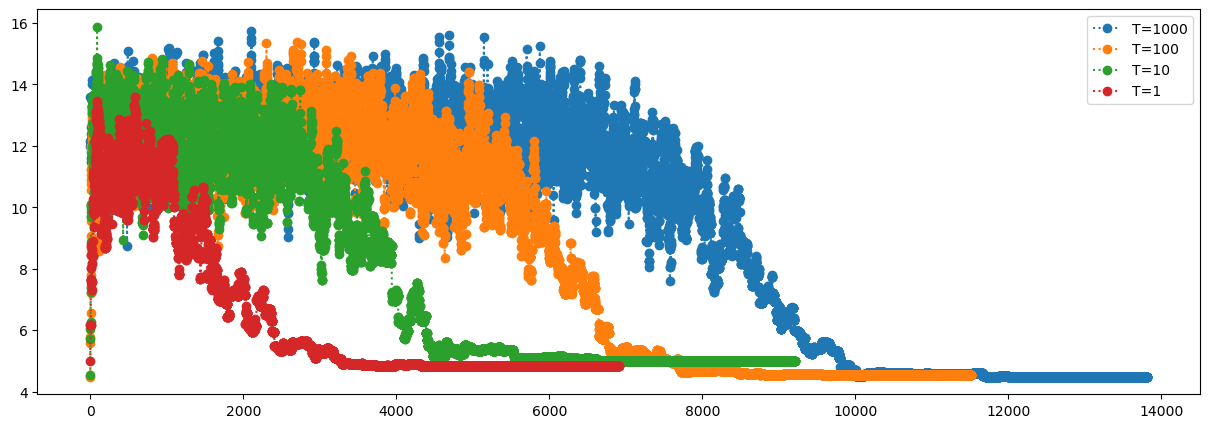

In [11]:
# Plot D versus samples tour

fig, ax=plt.subplots(figsize=(15,5))

ax.plot(sm_1000.Ds,'o:',label='T=1000')
ax.plot(sm_100.Ds,'o:',label='T=100')
ax.plot(sm_10.Ds,'o:',label='T=10')
ax.plot(sm_1.Ds,'o:',label='T=1')

ax.legend()

plt.savefig('salesman_D_T.pdf',bbox_inches='tight')
plt.show()

In [12]:
# Lets check different starting taus
sm_2=SalesmanAnneal(10,10,1e3,1e-3)
sm_3=SalesmanAnneal(10,10,5e3,1e-3,initTour=sm_2.initTour)
sm_4=SalesmanAnneal(10,10,1e4,1e-3,initTour=sm_2.initTour)


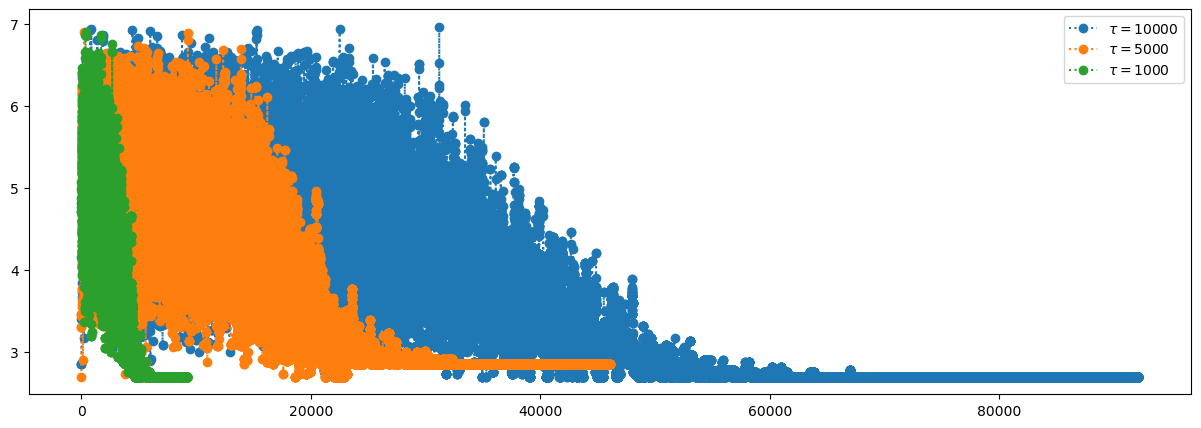

In [13]:
# Plot D versus samples tour

fig, ax=plt.subplots(figsize=(15,5))

ax.plot(sm_4.Ds,'o:',label=r'$\tau=10000$')
ax.plot(sm_3.Ds,'o:',label=r'$\tau=5000$')
ax.plot(sm_2.Ds,'o:',label=r'$\tau=1000$')

ax.legend()
plt.savefig('salesman_D_tau.pdf',bbox_inches='tight')
plt.show()